In [1]:
#filename = "data_test.txt"
filename = "data.txt"

In [2]:
with open(filename,"r") as f:
    lines = f.read().splitlines() #better than readlines because it removes the return character

In [3]:
lines

['201,376',
 '706,92',
 '161,698',
 '970,597',
 '751,579',
 '1031,337',
 '975,73',
 '800,520',
 '782,427',
 '316,332',
 '838,793',
 '388,653',
 '507,590',
 '1299,471',
 '547,368',
 '771,169',
 '152,562',
 '422,110',
 '279,844',
 '338,556',
 '45,135',
 '447,560',
 '704,231',
 '759,586',
 '271,686',
 '505,141',
 '423,262',
 '915,716',
 '730,52',
 '773,113',
 '1099,787',
 '821,157',
 '771,452',
 '940,95',
 '618,327',
 '1193,781',
 '243,677',
 '907,427',
 '878,84',
 '13,576',
 '1068,705',
 '371,777',
 '617,518',
 '1308,304',
 '972,108',
 '375,221',
 '213,481',
 '445,891',
 '576,427',
 '13,800',
 '899,5',
 '209,451',
 '895,787',
 '119,75',
 '231,7',
 '398,477',
 '652,131',
 '1213,142',
 '1004,885',
 '182,744',
 '805,753',
 '609,563',
 '997,38',
 '161,681',
 '1058,612',
 '920,535',
 '537,787',
 '510,598',
 '112,628',
 '775,112',
 '1210,232',
 '1057,288',
 '833,212',
 '517,621',
 '913,51',
 '1051,850',
 '321,158',
 '1230,474',
 '281,555',
 '591,77',
 '387,483',
 '567,555',
 '1195,868',
 '1255

In [4]:
#Process each line-by line
dots = []
folds= []

for l in lines:
    if not l == '':
        if 'fold' in l:
            foldy = l.find('y=')
            if not foldy ==-1:
                folds.append( ['y', int( l[foldy+2:] ) ] )
            foldx = l.find('x=')
            if not foldx ==-1:
                folds.append( ['x', int( l[foldx+2:] ) ] )
        else:
            dots.append(list(map(int, l.split(','))))

In [5]:
dots

[[201, 376],
 [706, 92],
 [161, 698],
 [970, 597],
 [751, 579],
 [1031, 337],
 [975, 73],
 [800, 520],
 [782, 427],
 [316, 332],
 [838, 793],
 [388, 653],
 [507, 590],
 [1299, 471],
 [547, 368],
 [771, 169],
 [152, 562],
 [422, 110],
 [279, 844],
 [338, 556],
 [45, 135],
 [447, 560],
 [704, 231],
 [759, 586],
 [271, 686],
 [505, 141],
 [423, 262],
 [915, 716],
 [730, 52],
 [773, 113],
 [1099, 787],
 [821, 157],
 [771, 452],
 [940, 95],
 [618, 327],
 [1193, 781],
 [243, 677],
 [907, 427],
 [878, 84],
 [13, 576],
 [1068, 705],
 [371, 777],
 [617, 518],
 [1308, 304],
 [972, 108],
 [375, 221],
 [213, 481],
 [445, 891],
 [576, 427],
 [13, 800],
 [899, 5],
 [209, 451],
 [895, 787],
 [119, 75],
 [231, 7],
 [398, 477],
 [652, 131],
 [1213, 142],
 [1004, 885],
 [182, 744],
 [805, 753],
 [609, 563],
 [997, 38],
 [161, 681],
 [1058, 612],
 [920, 535],
 [537, 787],
 [510, 598],
 [112, 628],
 [775, 112],
 [1210, 232],
 [1057, 288],
 [833, 212],
 [517, 621],
 [913, 51],
 [1051, 850],
 [321, 158],
 [

In [6]:
folds

[['x', 655],
 ['y', 447],
 ['x', 327],
 ['y', 223],
 ['x', 163],
 ['y', 111],
 ['x', 81],
 ['y', 55],
 ['x', 40],
 ['y', 27],
 ['y', 13],
 ['y', 6]]

In [7]:
#Process dots
import numpy as np
dots_np = np.array(dots)

In [8]:
papersize = np.max(dots_np, axis=0)+1
size_x, size_y = papersize

In [9]:
print(f"sizes x,y  = {size_x},{size_y}")

sizes x,y  = 1310,892


In [10]:
paper_dots = np.zeros((size_y,size_x) , dtype = np.int16)
#paper_dots

In [11]:
for d in dots:
    paper_dots[ int(d[1]), int(d[0]) ] = 1
paper_dots

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [14]:
def applyFoldTo(fold, paper_dots0):
    foldaxis = fold[0]
    coordinate = fold[1]

    folded = np.copy(paper_dots0)
    if foldaxis=='x':
        print(f"foldaxis: {foldaxis}")

        foldside = paper_dots0[:,coordinate+1:]
        print(f"foldside : {foldside}")
        foldside_mirr = np.flip(foldside,axis=1)
        print(f"foldside_mirr : {foldside_mirr}")

        folded = folded[:, :coordinate] #crop
        w0 = foldside_mirr.shape[1]
        print(f"coordinate = {coordinate} , w0 = {w0}")
        # coordinate - (w-(coordinate+1)) = 2*coordinate - w +1
        folded[:, -w0 : ] = np.maximum( folded[: , -w0 : ] , foldside_mirr )

    elif foldaxis=='y':
        print(f"foldaxis: {foldaxis}")
        foldside = paper_dots0[coordinate+1:,:]
        print(f"foldside : {foldside}")
        foldside_mirr = np.flip(foldside,axis=0)
        print(f"foldside_mirr : {foldside_mirr}")

        #w = paper_dots.shape[0]
        folded = folded[:coordinate, :] #crop
        w0 = foldside_mirr.shape[0]
        print(f"coordinate = {coordinate} , w0 = {w0}")
        # coordinate - (w-(coordinate+1)) = 2*coordinate - w +1
        folded[-w0 :  , : ] = np.maximum( folded[-w0 : ,: ] , foldside_mirr )

    print(f"folded: {folded}")
    return folded

In [15]:
paper_dots_i = np.copy(paper_dots) #initialise
for f in folds:
    paper_dots_i = applyFoldTo(f, paper_dots_i)

foldaxis: x
foldside : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
foldside_mirr : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
coordinate = 655 , w0 = 654
folded: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
foldaxis: y
foldside : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
foldside_mirr : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
coordinate = 447 , w0 = 444
folded: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
foldaxis: x
foldside : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0

In [16]:
print(paper_dots_i)

[[1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0
  1 1 0 0]
 [0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1
  0 0 1 0]
 [0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1
  0 0 0 0]
 [0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1
  0 0 0 0]
 [1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1
  0 0 1 0]
 [1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0
  1 1 0 0]]


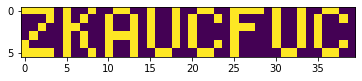

In [17]:
import matplotlib.pyplot as plt
plt.imshow(paper_dots_i)